# 2.1 数据操作

## 2.1.1. 入门

可以使用 arange 创建一个行向量 x,m默认整数 也可指定浮点数  

In [1]:
import torch
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以通过张量的shape属性来访问张量（沿每个轴的长度）的形状 
如果只想知道张量中元素的总数，即形状的所有元素乘积，可以用 size

In [ ]:
x.shape

In [ ]:
x.size()

In [ ]:
x.numel()

要想改变一个张量的形状而不改变元素数量和元素值，可以调用reshape函数
reshape函数只需要1个参数即可 剩下一个用-1代替
所以可以用x.reshape(-1,4)或x.reshape(3,-1)来取代x.reshape(3,4)

In [ ]:
X = x.reshape(3, 4)
X


In [ ]:
torch.zeros((2,3,4))

In [ ]:
torch.ones((2,3,4))

In [ ]:
torch.randn(3, 4)

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

## 2.1.2. 运算符

### cat 连接
参数dim 按哪个维度连接

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

In [3]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X,Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]), tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [ ]:
torch.cat((X,Y),dim=0)

In [ ]:
torch.cat((X,Y),dim=1)

### 逻辑运算

In [ ]:
X==Y

### 求和sum

In [ ]:
X.sum()

### 2.1.3 形状不同的张量调用广播机制执行按元素操作
会复制行或列 然后让张量形状相同

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b,a+b

### 2.1.4. 索引和切片

In [ ]:
X[-1], X[1:3]

也可修改元素

In [ ]:
X[1, 2] = 9
X

In [ ]:
X[0:2, :] = 12
X

### 2.1.5 其他python对象

In [4]:
import numpy
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

## 2.2 数据预处理


### 2.2.1. 读取数据集

In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [3]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 2.2.2. 处理缺失值
fillna

In [4]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


实现one hot encode的方式
pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
data: 要进行独热编码的 DataFrame 或 Series。

prefix: 生成的独热编码列的前缀。

prefix_sep: 生成的独热编码列的前缀和原始列名之间的分隔符。

dummy_na: 是否为原始数据中的缺失值生成独热编码列。

columns: 要进行独热编码的列的名称，如果指定，则只对这些列进行操作。

drop_first: 是否删除第一个独热编码列，以避免共线性问题。


In [6]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 2.2.3. 转换为张量格式

In [7]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3. 线性代数

In [9]:
x=torch.arange(4)
x

tensor([0, 1, 2, 3])

In [10]:
x[3]

tensor(3)

In [12]:
len(x)

4

In [18]:
x.shape

torch.Size([4])

In [20]:
A =torch.arange(20).reshape(4,5)
A

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [1]:
A.T

NameError: name 'A' is not defined

In [22]:
A.sum()

tensor(190)

In [24]:
A_sum0=A.sum(axis=0)
A_sum0

tensor([30, 34, 38, 42, 46])

In [25]:
A_sum1 = A.sum(axis=1)
A_sum1

tensor([10, 35, 60, 85])

In [27]:
A.mean()

RuntimeError: Can only calculate the mean of floating types. Got Long instead.

这里不能直接求均值 因为A元素为long类型 需要转换

In [5]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [29]:
A.mean()

tensor(9.5000)

In [31]:
A.sum()/A.numel()

tensor(9.5000)

In [37]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

非降维求和

In [39]:
A_sum00=A.sum(axis=0,keepdim=True)
A_sum00

tensor([[40., 45., 50., 55.]])

### 乘法

In [1]:
import torch
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y) 

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [3]:
# 矩阵向量乘法
import numpy as np
A.shape, x.shape, np.dot(A, x)

NameError: name 'A' is not defined

In [3]:
# 矩阵矩阵乘法
import numpy as np
A = np.arange(20, dtype=np.float32).reshape(5, 4)
B = np.ones(shape=(4, 3))
np.dot(A, B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

### 范数

In [7]:
# L2范数 向量元素平方和的平方根
import torch
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [8]:
# L1范数 向量元素的绝对值之和
torch.abs(u).sum()

tensor(7.)

In [9]:
# Frobenius范数 矩阵元素平方和的平方根
torch.norm(torch.ones((4, 9)))

## 2.4. 微积分

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h*= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [ ]:

import numpy as np
from matplotlib_inline import backend_inline
import torch
import matplotlib.pyplot as plt
def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h


def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

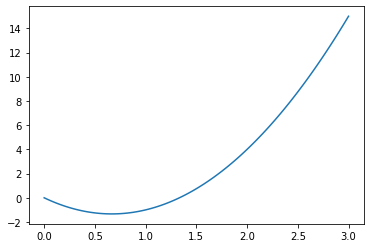

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 3, 100)
y = 3 * x ** 2 - 4 * x
plt.plot(x, y)
plt.show()


## 2.5 自动微分

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)  
x.grad  # 默认值是None

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4*x

tensor([True, True, True, True])

In [6]:
x.grad.zero_# 清除梯度

<function Tensor.zero_>

In [8]:
x.grad.zero_()# 清除梯度
y= x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [16]:
x.grad.zero_()
y = x * x

In [17]:
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 2.6 基本概率论

In [9]:
%matplotlib inline
import torch
from torch.distributions import multinomial
import torch
import matplotlib as plt

In [10]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [11]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [12]:
# 10次投掷
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 0., 1., 7., 1., 0.])

In [13]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1670, 0.1640, 0.1780, 0.1660, 0.1510, 0.1740])

In [14]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

plt.set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

AttributeError: module 'matplotlib' has no attribute 'set_figsize'

随机变量  本章将考虑离散空间中的概率
联合概率  A=a 和B= b同时满足的概率是多少
条件概率  在A=a已发生， B=b 的概率
贝叶斯定理
边际化  B的概率相当于计算A的所有可能选择
独立性  事件的发生跟事件的发生无关

## 2.7 查阅文档

查找模块中所有函数和类

In [17]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'bernoulli', 'beta', 'biject_to', 'binomial', 'categoric

查找用法

In [19]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the current device for the default 